In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset: 
superstore_df= pd.read_csv('superstore_sales.csv', encoding='ISO-8859-1').copy()
superstore_df= superstore_df.sort_values('Order Date')
superstore_df.to_csv('superstore_sales_updated.csv')
print(superstore_df.head())

      Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
8074    8075  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   
848      849  CA-2017-107503   1/1/2017  1/6/2017  Standard Class    GA-14725   
8075    8076  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   
8073    8074  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   
8071    8072  CA-2017-151750   1/1/2017  1/5/2017  Standard Class    JM-15250   

      Customer Name   Segment        Country        City  ... Postal Code  \
8074   Janet Martin  Consumer  United States  Huntsville  ...       77340   
848   Guy Armstrong  Consumer  United States      Lorain  ...       44052   
8075   Janet Martin  Consumer  United States  Huntsville  ...       77340   
8073   Janet Martin  Consumer  United States  Huntsville  ...       77340   
8071   Janet Martin  Consumer  United States  Huntsville  ...       77340   

       Region       Product ID         Category Su

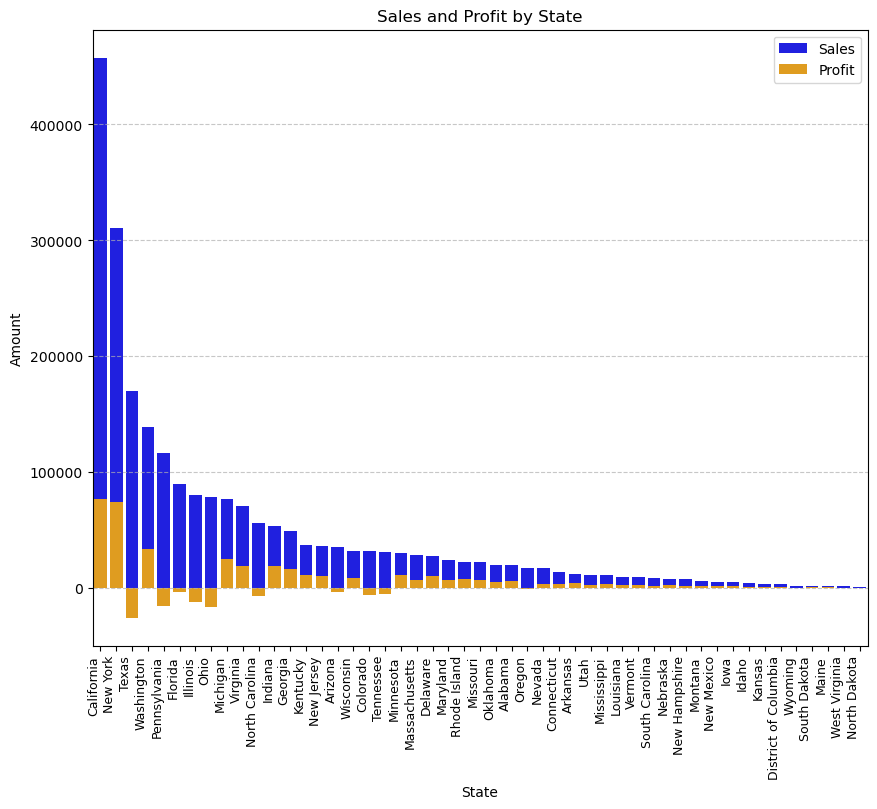

In [9]:
# Location Analysis (using 'State'):
location_analysis = superstore_df.groupby('State').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
location_analysis= location_analysis.sort_values('Sales', ascending=False)
# Drawing bar chart for sales and profit by State
plt.figure(figsize=(10, 8))

# Grouped bar plot for Sales and Profit by State
sns.barplot(x='State', y='Sales', data=location_analysis, color='blue', label='Sales')
sns.barplot(x='State', y='Profit', data=location_analysis, color='orange', label='Profit')

#Chart labels and title
plt.xlabel('State')
plt.ylabel('Amount')
plt.title('Sales and Profit by State')
plt.xticks(rotation=90, ha='right', fontsize=9) 
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.legend()

plt.show()

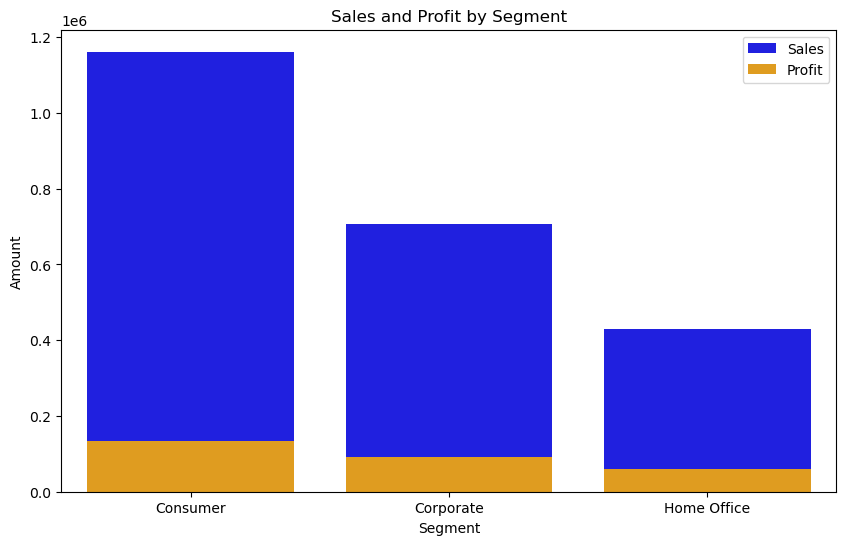

In [4]:
# Segment Analysis:
segment_analysis = superstore_df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()


# Drawing Bar chart for product Segment: 
plt.figure(figsize=(10, 6))

# Grouped bar plot for Sales and Profit by Segment
sns.barplot(x='Segment', y='Sales', data=segment_analysis, color='blue', label='Sales')
sns.barplot(x='Segment', y='Profit', data=segment_analysis, color='orange', label='Profit')

# Chart labels and title
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.title('Sales and Profit by Segment')
plt.legend()

plt.show()

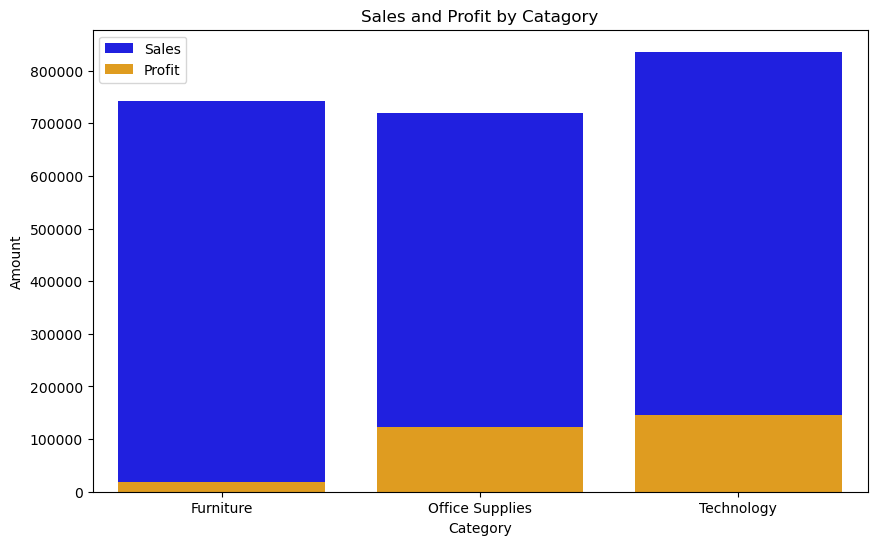

In [5]:
# Category Analysis:
category_analysis = superstore_df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()


# Assuming segment_analysis is your DataFrame
plt.figure(figsize=(10, 6))

# Grouped bar plot for Sales and Profit by Cetagory
sns.barplot(x='Category', y='Sales', data=category_analysis, color='blue', label='Sales')
sns.barplot(x='Category', y='Profit', data=category_analysis, color='orange', label='Profit')

# Chart labels and title
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Sales and Profit by Catagory')
plt.legend()

plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Name: Sub-Category, dtype: int64


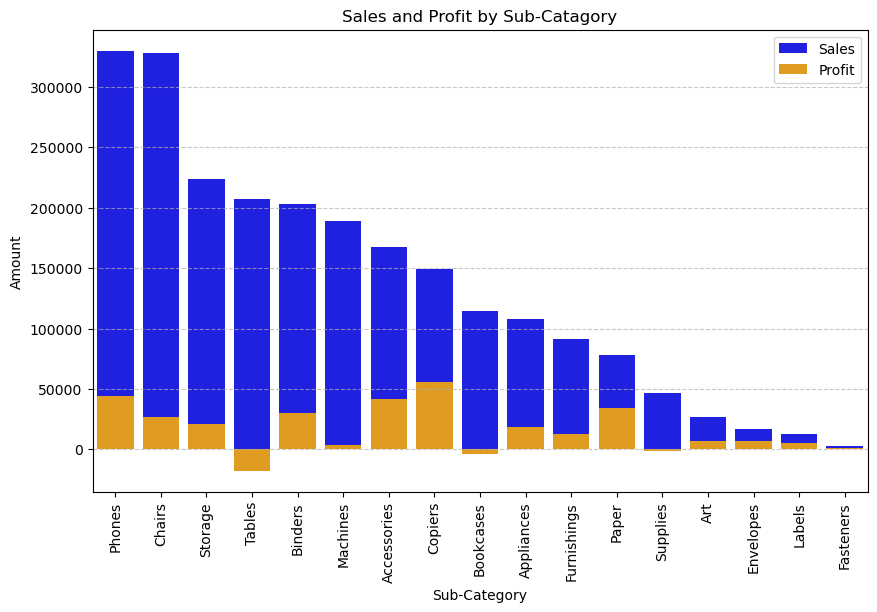

In [6]:
# Sub- Category Analysis
subcategory_analysis = superstore_df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
subcategory_analysis= subcategory_analysis.sort_values('Sales', ascending= False)
top_subcategory_order= superstore_df['Sub-Category'].value_counts()
print(top_subcategory_order.head())

# Drawing Bar chart for Sub-Cetagory
plt.figure(figsize=(10, 6))

# Grouped bar plot for Sales and Profit by Sub-Cetagory
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_analysis, color='blue', label='Sales')
sns.barplot(x='Sub-Category', y='Profit', data=subcategory_analysis, color='orange', label='Profit')

# chart label and title
plt.xlabel('Sub-Category')
plt.ylabel('Amount')
plt.title('Sales and Profit by Sub-Catagory')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.legend()

plt.show()

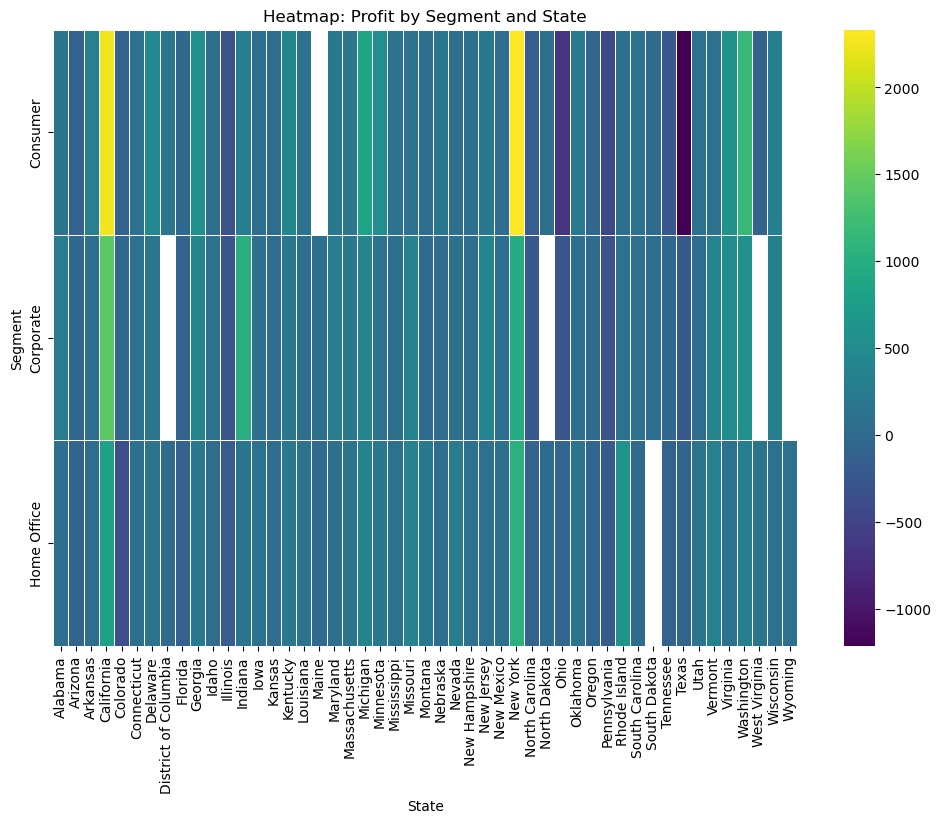

In [8]:
#Preparing Heatmap for Segment, Sub-catagory and State for Profit analysis:
combine_analysis= superstore_df.groupby(['Segment', 'Sub-Category', 'State']).agg({'Profit': 'sum'}).reset_index()
# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = combine_analysis.pivot_table(index='Segment', columns='State', values='Profit')
sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f", linewidths=.5)
plt.title('Heatmap: Profit by Segment and State')
plt.show()